<a href="https://colab.research.google.com/github/stutimongia2024/MLnow_2.0/blob/main/01_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Linear Regression

[Link to download the dataset used](https://docs.google.com/spreadsheets/d/1JlzmaNU8IX-k4x_YwctTpt3LwyZf8wssEGcAQBEwt7o/edit#gid=1228793274)

Author: Stuti Mongia

Mentor: Shivani Shimpi

##Setup

In [99]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
cd '/content/drive/MyDrive/LiveCodeSession/EDA'

/content/drive/MyDrive/LiveCodeSession/EDA


In [101]:
ls


02_Univariate.ipynb      StudentsPerformance.gsheet
StudentsPerformance.csv  univariate_MathData_2.csv


In [102]:
import os


In [103]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [104]:
mathData = pd.read_csv('StudentsPerformance.csv', sep=',') #load the csv file as dataframe

In [105]:
mathData.head(10) #print the first ten rows of the dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


We are just going to consider the columns reading score and writing score for univariate linear regression

In [106]:
uniMathData = mathData[['reading score', 'writing score']]
uniMathData.head(5)


,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [107]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [108]:
ls

02_Univariate.ipynb      StudentsPerformance.gsheet
StudentsPerformance.csv  univariate_MathData_2.csv


##Data Visulaization

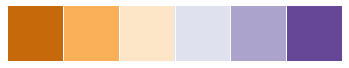

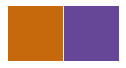

In [109]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [110]:
uniMathData.columns #columns in the dataframe

Index(['reading score', 'writing score'], dtype='object')

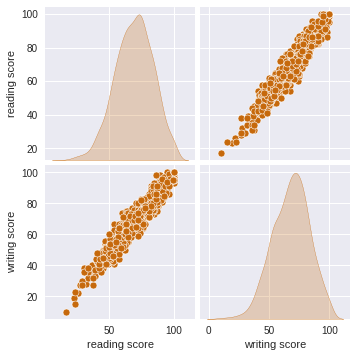

In [111]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['reading score', 'writing score'],
             y_vars =  ['reading score', 'writing score'],
       diag_kind='kde'
             )

##Data Splits

In [112]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     reading score  writing score
993             72             74
859             73             72
298             46             50
553             62             64
672             78             76
    reading score  writing score
9              60             50
11             52             43
19             58             61
23             73             73
28             70             65


In [113]:
print(trainDataset.shape)
print(testDataset.shape)

(800, 2)
(200, 2)


In [114]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     reading score  writing score
993             72             74
859             73             72
298             46             50
553             62             64
672             78             76
    reading score  writing score
9              60             50
11             52             43
19             58             61
23             73             73
28             70             65


In [115]:
#removing the writing score column and saving it into the labels variable

trainLabels = trainFeatures.pop('writing score')
testLabels = testFeatures.pop('writing score')

print(trainLabels.head())
print(testLabels.head())

993    74
859    72
298    50
553    64
672    76
Name: writing score, dtype: int64
9     50
11    43
19    61
23    73
28    65
Name: writing score, dtype: int64


In [116]:
print(trainFeatures.head())
print(testFeatures.head())

     reading score
993             72
859             73
298             46
553             62
672             78
    reading score
9              60
11             52
19             58
23             73
28             70


In [117]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [118]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [119]:
numEpochs = 5000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
25/25 [==============================] - 0s 3ms/step - loss: 3.6027 - mae: 3.6027 - mse: 20.4177 - val_loss: 3.6973 - val_mae: 3.6973 - val_mse: 21.1081
Epoch 2502/5000
25/25 [==============================] - 0s 3ms/step - loss: 3.5925 - mae: 3.5925 - mse: 20.3483 - val_loss: 3.7010 - val_mae: 3.7010 - val_mse: 21.1173
Epoch 2503/5000
25/25 [==============================] - 0s 4ms/step - loss: 3.5899 - mae: 3.5899 - mse: 20.3503 - val_loss: 3.6964 - val_mae: 3.6964 - val_mse: 21.1014
Epoch 2504/5000
25/25 [==============================] - 0s 3ms/step - loss: 3.5885 - mae: 3.5885 - mse: 20.3305 - val_loss: 3.7054 - val_mae: 3.7054 - val_mse: 21.1263
Epoch 2505/5000
25/25 [==============================] - 0s 4ms/step - loss: 3.5905 - mae: 3.5905 - mse: 20.3504 - val_loss: 3.6959 - val_mae: 3.6959 - val_mse: 21.1016
Epoch 2506/5000
25/25 [==============================] - 0s 4ms/step - loss: 3.5989 - mae: 3.5989 - mse:

In [120]:
print(history)

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


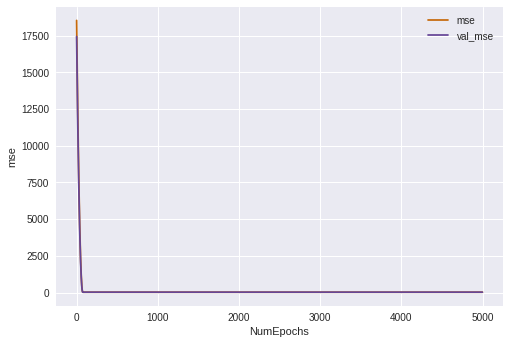

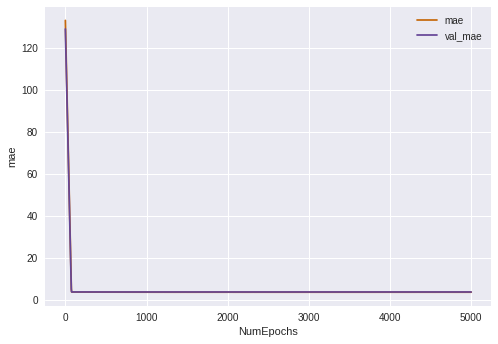

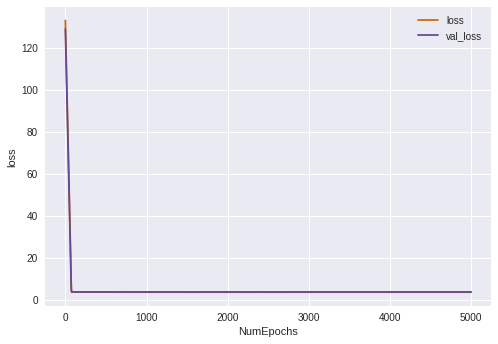

In [122]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [123]:
model.predict([1])

array([[-0.10669875]], dtype=float32)

In [124]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[-0.10669875]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[-0.10669875]
 [ 0.8949481 ]
 [ 1.8965949 ]
 [ 2.898242  ]
 [ 3.899889  ]]

List of Predictions (flattened out):
[-0.10669875  0.8949481   1.8965949   2.898242    3.899889  ]



In [125]:
print(testFeatures)

     reading score
9               60
11              52
19              58
23              73
28              70
..             ...
962            100
966             68
976             62
980             24
983             87

[200 rows x 1 columns]


In [126]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [127]:

print(len(testPreds))
print(testPreds)

200
[58.990467 50.97729  56.987175 72.01188  69.006935 71.01023  80.025055
 72.01188  56.987175 63.998703 70.00858  77.02011  53.982235 57.98882
 61.995407 49.975647 47.97235  45.96906  37.955883 82.02834  70.00858
 32.947647 85.03329  80.025055 66.002    66.002    76.01846  68.00529
 55.985527 81.026695 83.02999  35.95259  59.992115 41.96247  67.00364
 74.01517  66.002    69.006935 74.01517  49.975647 76.01846  67.00364
 48.974    68.00529  50.97729  62.997055 54.98388  80.025055 68.00529
 59.992115 71.01023  48.974    73.01353  62.997055 72.01188  76.01846
 78.02176  40.960823 75.016815 69.006935 77.02011  61.995407 50.97729
 81.026695 74.01517  72.01188  58.990467 39.959175 66.002    50.97729
 62.997055 85.03329  51.97894  44.96741  74.01517  67.00364  89.03987
 62.997055 76.01846  72.01188  96.0514   94.04811  47.97235  77.02011
 62.997055 66.002    61.995407 70.00858  82.02834  84.03164  65.00035
 71.01023  72.01188  81.026695 44.96741  84.03164  63.998703 52.980587
 85.03329  45.

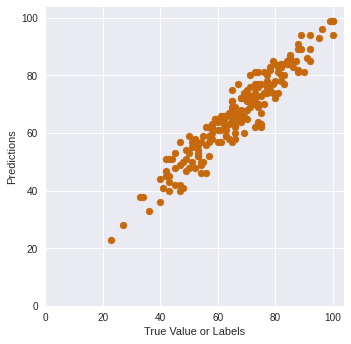

In [130]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

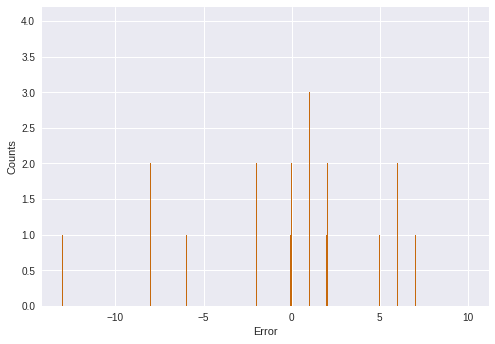

In [129]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)